<a href="https://colab.research.google.com/github/wewerthonc/AI-projects/blob/main/The_GitHub_History_of_the_Scala_Language_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/MyDrive')
PATH_BASE = '/content/MyDrive/MyDrive/Datasets/'

In [5]:
# Loading in the data
pulls_one = pd.read_csv(PATH_BASE + 'pulls_2011-2013.csv')
pulls_two = pd.read_csv(PATH_BASE + 'pulls_2014-2018.csv')
pull_files = pd.read_csv(PATH_BASE + 'pull_files.csv')

In [7]:
pulls = pd.concat([pulls_one, pulls_two], verify_integrity = True, ignore_index = True)
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

# Merging the two DataFrames
data = pd.merge(pulls, pull_files, on = 'pid')

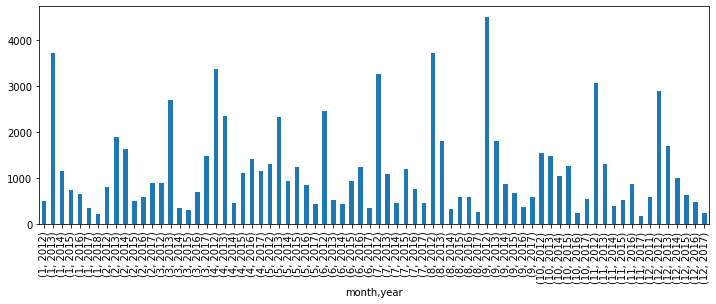

In [8]:
data['month'] = data['date'].apply(lambda value: value.month)

data['year'] = data['date'].apply(lambda value: value.year)

# Grouping by the month and year and counting the pull requests
counts = data.groupby(['month', 'year']).count()

counts['pid'].plot(kind='bar', figsize = (12,4))

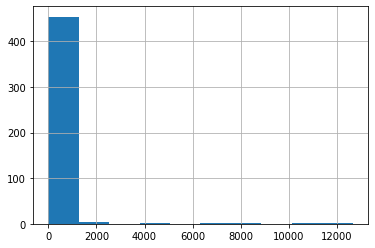

In [10]:
# Grouping by the submitter
by_user = data.groupby('user')['pid'].count()

#The number of pull requests submitted by each user
by_user.hist()

In [ ]:
# Identifying the last 10 pull requests
last_10 = pulls.sort_values(['date']).tail(10)

# Joining the two data sets
joined_pr = pd.merge(last_10, pull_files, on = 'pid')

# Identifying the unique files
files = joined_pr['file'].unique()

# Print the results
print(files)

In [17]:
# The most pull requests to a given a file:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identifying the commits that changed the file
file_pr = data[data['file'] == file]

# Counting the number of changes made by each developer
author_counts = file_pr.groupby('user')['pid'].count().sort_values(ascending = False)

# The top 3 developers
print(author_counts[:3])

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64


In [18]:
#Who made The last ten pull requets to a given file
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merging the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on = 'pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
print(users_last_10)

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

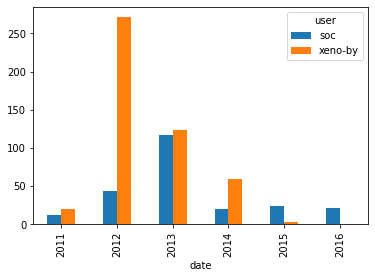

In [20]:
# The pull requests of a given developer
authors = ['xeno-by', 'soc']

# All the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Counting the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], pulls['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Converting the table to a wide format
counts_wide = counts.pivot_table(index = 'date', columns='user', values='pid', fill_value=0)

counts_wide.plot(kind = 'bar')

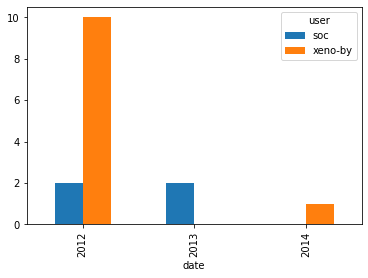

In [21]:
#Visualizing the contributions of each developer

authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# The pull requests submitted by the authors
by_author = data[data['user'].isin(authors)]

# The pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Grouping and counting the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transforming the data into a wide format
by_file_wide = grouped.pivot_table(index = 'date', columns = 'user', values = 'pid', fill_value = 0)

by_file_wide.plot(kind='bar')